In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

In [147]:
df = pd.read_csv('speeddating.csv')

In [148]:
selected_features = ['age', 'age_o', 'expected_happy_with_sd_people', 'interests_correlate','match']


In [149]:
df = df[selected_features]
df = df.dropna()

<AxesSubplot:>

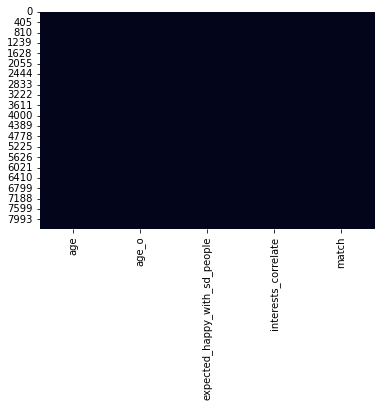

In [150]:
sns.heatmap(df.isnull(), cbar=False)

In [151]:
y = df.drop(columns = ['age', 'age_o', 'expected_happy_with_sd_people', 'interests_correlate'])
y = np.array(y)
X = df.drop(columns=["match"])
X = pd.get_dummies(X)
X = np.array(X)

In [152]:
y

array([["b'0'"],
       ["b'0'"],
       ["b'1'"],
       ...,
       ["b'0'"],
       ["b'0'"],
       ["b'0'"]], dtype=object)

In [153]:
X.shape

(8148, 4)

In [154]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0, shuffle = True)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

/home/felipe/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8359918200408998

In [156]:
DecTree = DecisionTreeClassifier(random_state=0,max_depth=10)
cross_scores = cross_val_score(DecTree, X_train, y_train, cv=10)
print(np.mean(cross_scores))

0.8129077948812486


In [158]:
RandTree = RandomForestClassifier(max_depth=10, random_state=42, n_estimators=100)
cross_scores = cross_val_score(RandTree, X, y, cv=10)
print(np.mean(cross_scores),'\n',cross_scores)

/home/felipe/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/felipe/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/felipe/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/felipe/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConvers

0.829039206523869 
 [0.83312883 0.80368098 0.83558282 0.8208589  0.82331288 0.83558282
 0.83435583 0.83435583 0.83538084 0.83415233]
